# Pré-processamento

In [1]:
import pandas as pd
import numpy as np
import nltk

df = pd.read_csv('dodfs_extraidos_2020.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df

,tipo_ato,ato
0,abono,"ABONO DE PERMANENCIA\nESPECIAL,equivalente ao ..."
1,abono,"Abono de Permanencia aGENIVAN SILVA\nMORAES, m..."
2,abono,Abono de Permanencia equivalenteao valor da re...
3,abono,abono de permanencia aoservidor IZAI JACOBINO ...
4,abono,abono\nde permanencia equivalenteao valor de s...
...,...,...
50356,substituicao,"Designar LUCAS VINICIUS DE ANDRADE, matricula ..."
50357,substituicao,"Designar KEYLLA CRISTINA SILVA LIMA, matricula no"
50358,substituicao,"Designar MICHELLE OLIVEIRA DA SILVA SANTIAGO, ..."
50359,substituicao,"DESIGNAR DANNIEL VARGAS DE SIQUEIRA CAMPOS, ma..."


In [2]:
df.loc[df.tipo_ato == 'retificacoes']

,tipo_ato,ato
29241,retificacoes,"RETIFICAR, na ordem de servico n 89 de 02/05/2..."
29242,retificacoes,"RETIFICAR, na ordem de servico n 6, de 20/01/2..."
29243,retificacoes,"RETIFICAR, na ordem de servico n 29, de 07/03/..."
29244,retificacoes,"RETIFICAR, na ordem de servico n 63, de 03/04/..."
29245,retificacoes,"RETIFICAR, na ordem de servico n 93 de 04/05/2..."
29246,retificacoes,"RETIFICAR, na ordem de servico n 93, de 04/05/..."
29247,retificacoes,"RETIFICAR, na ordem de servico n 27, de 04/03/..."
29248,retificacoes,"RETIFICAR, na ordem de servico n 93, de 04/05/..."


In [3]:
d = {'substituicao': 'Ato_Substituicao',
    'nomeacao': 'Ato_Nomeacao_Comissionado',
    'exoneracao': 'Ato_Exoneracao_Comissionado',
    'cessoes': 'Ato_Cessao',
    'abono': 'Ato_Abono_Permanencia',
    'efetivos_exo': 'Ato_Exoneracao_Efetivo',
    'sem_efeito_aposentadoria': 'Ato_Tornado_Sem_Efeito_Apo',
    'efetivos_nome': 'Ato_Nomeacao_Efetivo',
    'reversoes': 'Ato_Reversao',
    'aposentadoria': 'Ato_Aposentadoria',
    'retificacoes': 'Ato_Retificacao_Efetivo'}

In [4]:
df.tipo_ato = df.tipo_ato.apply(lambda x: d[x])
df

,tipo_ato,ato
0,Ato_Abono_Permanencia,"ABONO DE PERMANENCIA\nESPECIAL,equivalente ao ..."
1,Ato_Abono_Permanencia,"Abono de Permanencia aGENIVAN SILVA\nMORAES, m..."
2,Ato_Abono_Permanencia,Abono de Permanencia equivalenteao valor da re...
3,Ato_Abono_Permanencia,abono de permanencia aoservidor IZAI JACOBINO ...
4,Ato_Abono_Permanencia,abono\nde permanencia equivalenteao valor de s...
...,...,...
50356,Ato_Substituicao,"Designar LUCAS VINICIUS DE ANDRADE, matricula ..."
50357,Ato_Substituicao,"Designar KEYLLA CRISTINA SILVA LIMA, matricula no"
50358,Ato_Substituicao,"Designar MICHELLE OLIVEIRA DA SILVA SANTIAGO, ..."
50359,Ato_Substituicao,"DESIGNAR DANNIEL VARGAS DE SIQUEIRA CAMPOS, ma..."


In [5]:
df['tipo_ato'].value_counts()

Ato_Substituicao               20803
Ato_Nomeacao_Comissionado      13780
Ato_Exoneracao_Comissionado    10662
Ato_Aposentadoria               3419
Ato_Cessao                       625
Ato_Abono_Permanencia            333
Ato_Exoneracao_Efetivo           323
Ato_Tornado_Sem_Efeito_Apo       292
Ato_Nomeacao_Efetivo              99
Ato_Reversao                      17
Ato_Retificacao_Efetivo            8
Name: tipo_ato, dtype: int64

In [6]:
df = df.sample(frac=1)
df = df.reset_index(drop = True)
original = df.copy()

### Retira caracteres não-alfanuméricos ("(", ",", ".", "\n", etc)

In [7]:
df['ato'] = df.ato.str.replace('\W', ' ')
df

,tipo_ato,ato
0,Ato_Exoneracao_Comissionado,EXONERAR por extincao do cargo MIRIAM BENETO...
1,Ato_Retificacao_Efetivo,RETIFICAR na ordem de servico n 93 de 04 05 ...
2,Ato_Nomeacao_Comissionado,NOMEAR FRANCISCA ALVES DE SOUZA RODRIGUES Age...
3,Ato_Substituicao,DESIGNAR ISABELLA FERREIRA COSTA representant...
4,Ato_Substituicao,DESIGNAR LUCINEIDE LEANDRO DA COSTA matricula...
...,...,...
50356,Ato_Exoneracao_Comissionado,EXONERAR GABRIELA VIEIRA PACHECO do Cargo em C...
50357,Ato_Substituicao,Designar DILSON FRANCISCO ROSA matricula 276 ...
50358,Ato_Substituicao,DESIGNAR MARINALVA ALVES FLERY para exercer a ...
50359,Ato_Exoneracao_Comissionado,EXONERAR a pedido ROSELI DE SOUSA COSTA mat...


### Remoção de stopwords

In [8]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [9]:
df['ato'] = df['ato'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))
df

,tipo_ato,ato
0,Ato_Exoneracao_Comissionado,EXONERAR extincao cargo MIRIAM BENETON VALIM C...
1,Ato_Retificacao_Efetivo,RETIFICAR ordem servico n 93 04 05 2017 public...
2,Ato_Nomeacao_Comissionado,NOMEAR FRANCISCA ALVES DE SOUZA RODRIGUES Agen...
3,Ato_Substituicao,DESIGNAR ISABELLA FERREIRA COSTA representante...
4,Ato_Substituicao,DESIGNAR LUCINEIDE LEANDRO DA COSTA matricula ...
...,...,...
50356,Ato_Exoneracao_Comissionado,EXONERAR GABRIELA VIEIRA PACHECO Cargo Comissa...
50357,Ato_Substituicao,Designar DILSON FRANCISCO ROSA matricula 276 7...
50358,Ato_Substituicao,DESIGNAR MARINALVA ALVES FLERY exercer Funcao ...
50359,Ato_Exoneracao_Comissionado,EXONERAR pedido ROSELI DE SOUSA COSTA matricul...


### Stemming

In [10]:
stemmer = nltk.stem.RSLPStemmer()

In [11]:
df['ato'] = df['ato'].apply(lambda x: ' '.join([stemmer.stem(item) for item in x.split()]))
df

,tipo_ato,ato
0,Ato_Exoneracao_Comissionado,exoner extinca carg mir beneton valim carg pub...
1,Ato_Retificacao_Efetivo,retific ord serv n 93 04 05 2017 public dodf n...
2,Ato_Nomeacao_Comissionado,nome francisc alv de souz rodrig agent socioed...
3,Ato_Substituicao,design isabell ferr cost represent cam dirig l...
4,Ato_Substituicao,design lucineid leandr da cost matricul 043 72...
...,...,...
50356,Ato_Exoneracao_Comissionado,exoner gabriel vie pachec carg comissa simbol ...
50357,Ato_Substituicao,design dilson francisc ros matricul 276 711 2 ...
50358,Ato_Substituicao,design marinalv alv flery exerc funca membr su...
50359,Ato_Exoneracao_Comissionado,exoner ped rosel de sous cost matricul 0138013...


### Carregando modelos

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
import pickle
file = open('classificadores_treinados', 'rb')
clf_rf = pickle.load(file)
clf_dt = pickle.load(file)
clf_sgd = pickle.load(file)
vectorizer = pickle.load(file)
file.close()

In [14]:
clf_rf

RandomForestClassifier(max_features=0.1, n_estimators=500, n_jobs=2,
                       random_state=87)

In [15]:
clf_dt

DecisionTreeClassifier(criterion='entropy', random_state=87)

In [16]:
clf_sgd

SGDClassifier(alpha=5e-05, penalty='elasticnet', random_state=87)

In [17]:
vectorizer

TfidfVectorizer(max_df=0.9, min_df=2,
                stop_words=['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em',
                            'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se',
                            'na', 'por', 'mais', 'as', 'dos', 'como', 'mas',
                            'ao', 'ele', 'das', 'à', 'seu', 'sua', ...])

### Aplicação do tfidf

In [18]:
X = vectorizer.transform(df['ato'])
X

<50361x2767 sparse matrix of type '<class 'numpy.float64'>'
	with 1437095 stored elements in Compressed Sparse Row format>

# Classificação

In [19]:
from sklearn.metrics import classification_report

In [20]:
y = np.array(df['tipo_ato'])

In [21]:
# Random Forest
y_true, y_pred = y, clf_rf.predict(X)
print(classification_report(y_true, y_pred))

C:\Users\felip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

         Ato_Abono_Permanencia       0.67      0.43      0.52       333
             Ato_Aposentadoria       1.00      0.97      0.98      3419
                    Ato_Cessao       0.99      0.98      0.98       625
   Ato_Exoneracao_Comissionado       0.94      0.99      0.97     10662
        Ato_Exoneracao_Efetivo       0.12      0.03      0.05       323
     Ato_Nomeacao_Comissionado       0.94      0.97      0.95     13780
          Ato_Nomeacao_Efetivo       0.33      0.76      0.46        99
  Ato_Retificacao_Comissionado       0.00      0.00      0.00         0
       Ato_Retificacao_Efetivo       0.05      0.88      0.09         8
                  Ato_Reversao       0.89      0.47      0.62        17
              Ato_Substituicao       0.99      0.96      0.98     20803
    Ato_Tornado_Sem_Efeito_Apo       0.99      0.50      0.66       292
Ato_Tornado_Sem_Efeito_Exo_Nom       0.00      0.00      0.00  

In [22]:
# Decision Tree Classifier
y_true, y_pred = y, clf_dt.predict(X)
print(classification_report(y_true, y_pred))

C:\Users\felip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

         Ato_Abono_Permanencia       0.95      0.12      0.21       333
             Ato_Aposentadoria       0.00      0.00      0.00      3419
                    Ato_Cessao       0.83      0.96      0.89       625
   Ato_Exoneracao_Comissionado       0.91      0.99      0.95     10662
        Ato_Exoneracao_Efetivo       0.17      0.07      0.09       323
     Ato_Nomeacao_Comissionado       0.89      0.96      0.93     13780
          Ato_Nomeacao_Efetivo       0.39      0.95      0.55        99
  Ato_Retificacao_Comissionado       0.00      0.00      0.00         0
       Ato_Retificacao_Efetivo       0.16      0.88      0.27         8
                  Ato_Reversao       1.00      0.35      0.52        17
              Ato_Substituicao       0.98      0.93      0.95     20803
    Ato_Tornado_Sem_Efeito_Apo       0.02      0.18      0.03       292
Ato_Tornado_Sem_Efeito_Exo_Nom       0.00      0.00      0.00  

In [23]:
# SGD
y_true, y_pred = y, clf_sgd.predict(X)
print(classification_report(y_true, y_pred))

                                precision    recall  f1-score   support

         Ato_Abono_Permanencia       0.70      0.70      0.70       333
             Ato_Aposentadoria       0.99      0.94      0.96      3419
                    Ato_Cessao       0.90      1.00      0.95       625
   Ato_Exoneracao_Comissionado       0.93      0.99      0.96     10662
        Ato_Exoneracao_Efetivo       0.03      0.02      0.03       323
     Ato_Nomeacao_Comissionado       0.87      0.99      0.92     13780
          Ato_Nomeacao_Efetivo       0.25      1.00      0.39        99
  Ato_Retificacao_Comissionado       0.00      0.00      0.00         0
       Ato_Retificacao_Efetivo       0.01      1.00      0.02         8
                  Ato_Reversao       0.07      0.12      0.09        17
              Ato_Substituicao       1.00      0.83      0.91     20803
    Ato_Tornado_Sem_Efeito_Apo       0.98      0.14      0.24       292
Ato_Tornado_Sem_Efeito_Exo_Nom       0.00      0.00      0.00  

# Matriz de confusão

In [70]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

def plotConfusionMatrix(classifier, X_test, y_test, class_names):
    np.set_printoptions(precision=2)

    fig, ax = plt.subplots(figsize=(13, 13))
    disp = plot_confusion_matrix(classifier, X_test, y_test,display_labels=class_names,cmap=plt.cm.Blues, ax = ax)
    disp.ax_.set_title("Matriz de Confusão")
    plt.show()

In [74]:
atos_nomes = ['Abono', 'Apo', 'Cessao', 'ExoCom', 'ExoEfe', 'NomCom', 'NomEfe', 'RetCom', 'RetEfe', 'Rev', 'Subs', 'SEApo', 'SEExoNom']

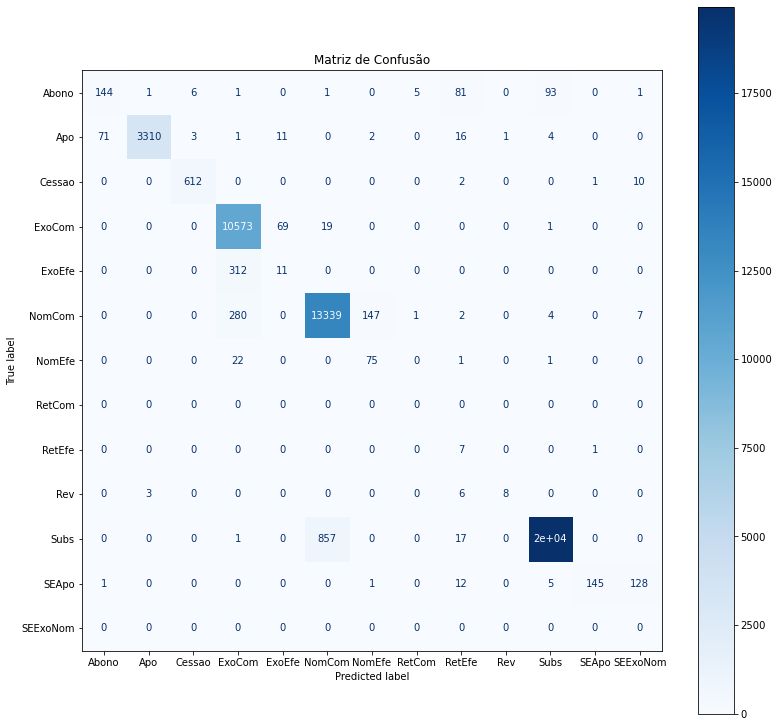

In [75]:
plotConfusionMatrix(clf_rf, X, y, atos_nomes)

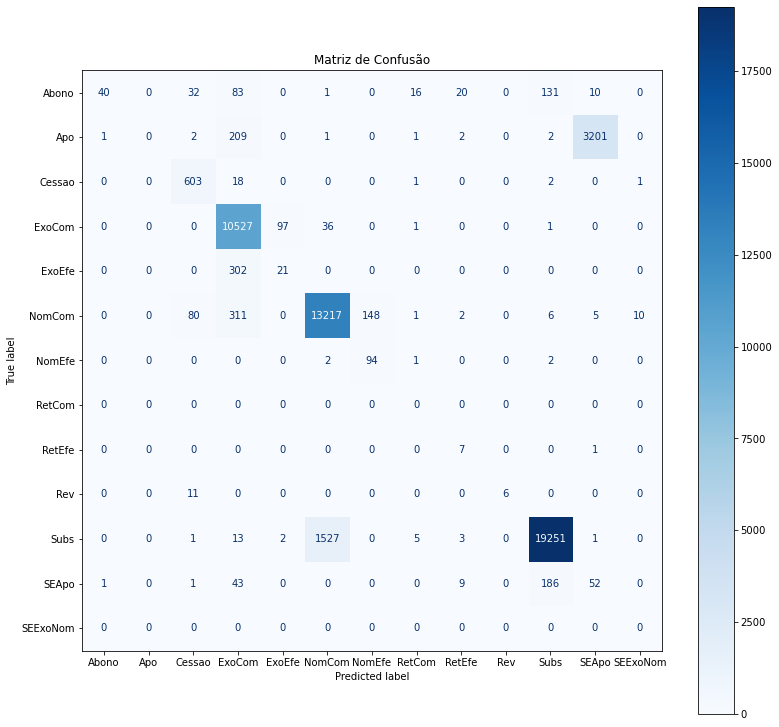

In [76]:
plotConfusionMatrix(clf_dt, X, y, atos_nomes)

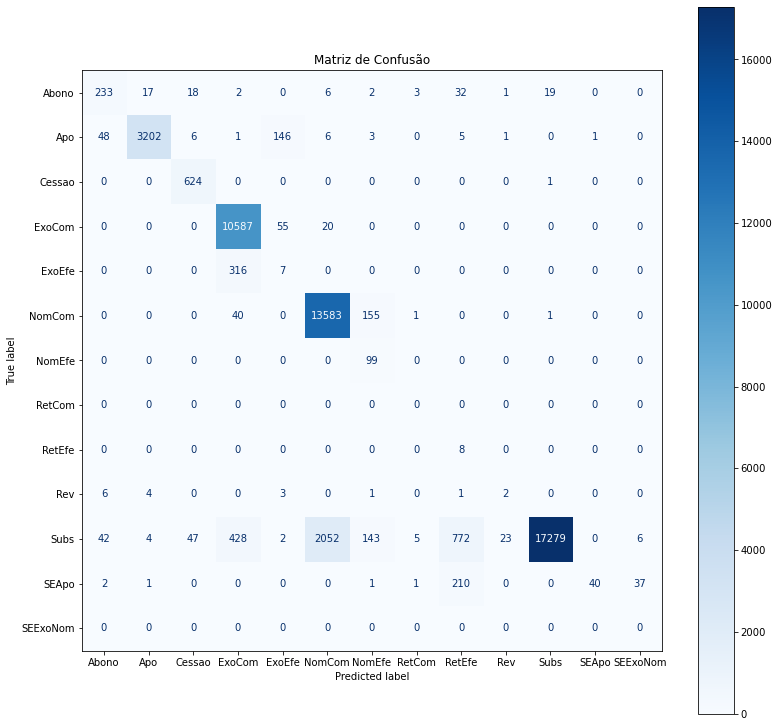

In [77]:
plotConfusionMatrix(clf_sgd, X, y, atos_nomes)

## Cohen's kappa

In [35]:
y_rf = clf_rf.predict(X)
y_dt = clf_dt.predict(X)
y_sgd = clf_sgd.predict(X)

In [36]:
from sklearn.metrics import cohen_kappa_score
print("RFC: %.3f" %cohen_kappa_score(y, y_rf))
print("DTC: %.3f" %cohen_kappa_score(y, y_dt))
print("SGD: %.3f" %cohen_kappa_score(y, y_sgd))

RFC: 0.938
DTC: 0.817
SGD: 0.871


In [37]:
from sklearn.metrics import cohen_kappa_score
print("RFC com DTC: %.3f" %cohen_kappa_score(y_dt, y_rf))
print("DTC com SGD: %.3f" %cohen_kappa_score(y_sgd, y_dt))
print("SGD com RFC: %.3f" %cohen_kappa_score(y_rf, y_sgd))

RFC com DTC: 0.865
DTC com SGD: 0.814
SGD com RFC: 0.897


## Fleiss' kappa

In [27]:
np.unique(y)

array(['Ato_Abono_Permanencia', 'Ato_Aposentadoria', 'Ato_Cessao',
       'Ato_Exoneracao_Comissionado', 'Ato_Exoneracao_Efetivo',
       'Ato_Nomeacao_Comissionado', 'Ato_Nomeacao_Efetivo',
       'Ato_Retificacao_Efetivo', 'Ato_Reversao', 'Ato_Substituicao',
       'Ato_Tornado_Sem_Efeito_Apo'], dtype=object)

In [47]:
m = {}
index = 0
for i in np.unique(y):
    m[i] = index
    index += 1
    
m['Ato_Tornado_Sem_Efeito_Exo_Nom'] = 11
m['Ato_Retificacao_Comissionado'] = 12
m

{'Ato_Abono_Permanencia': 0,
 'Ato_Aposentadoria': 1,
 'Ato_Cessao': 2,
 'Ato_Exoneracao_Comissionado': 3,
 'Ato_Exoneracao_Efetivo': 4,
 'Ato_Nomeacao_Comissionado': 5,
 'Ato_Nomeacao_Efetivo': 6,
 'Ato_Retificacao_Efetivo': 7,
 'Ato_Reversao': 8,
 'Ato_Substituicao': 9,
 'Ato_Tornado_Sem_Efeito_Apo': 10,
 'Ato_Tornado_Sem_Efeito_Exo_Nom': 11,
 'Ato_Retificacao_Comissionado': 12}

In [48]:
fun = np.vectorize(lambda x: m[x])

In [49]:
fun(y)

array([3, 7, 5, ..., 9, 3, 3])

In [50]:
np.zeros((2, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [51]:
len(y)

50361

In [59]:
k = np.zeros((len(y), 13))

In [60]:
fy = fun(y)
fy_rf = fun(y_rf)
fy_dt = fun(y_dt)
fy_sgd = fun(y_sgd)

In [61]:
for i in range(0, len(y)):
    k[i][fy[i]] += 1
    k[i][fy_rf[i]] += 1
    k[i][fy_dt[i]] += 1
    k[i][fy_sgd[i]] += 1

In [62]:
k[:5]

array([[0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0.]])

In [63]:
from statsmodels.stats.inter_rater import fleiss_kappa
fleiss_kappa(k)

0.866722752026894

In [64]:
fleiss_kappa(k, method = 'rand')

0.8968243724751738

# Análise dos dados classificados incorretamente

In [65]:
d = {}
for i in np.unique(y):
    d[i] = []
 
d['Ato_Tornado_Sem_Efeito_Exo_Nom'] = []
d['Ato_Retificacao_Comissionado'] = []
d

{'Ato_Abono_Permanencia': [],
 'Ato_Aposentadoria': [],
 'Ato_Cessao': [],
 'Ato_Exoneracao_Comissionado': [],
 'Ato_Exoneracao_Efetivo': [],
 'Ato_Nomeacao_Comissionado': [],
 'Ato_Nomeacao_Efetivo': [],
 'Ato_Retificacao_Efetivo': [],
 'Ato_Reversao': [],
 'Ato_Substituicao': [],
 'Ato_Tornado_Sem_Efeito_Apo': [],
 'Ato_Tornado_Sem_Efeito_Exo_Nom': [],
 'Ato_Retificacao_Comissionado': []}

In [66]:
for i in range(0, len(y)):
    acordo = 3
    if y[i] != y_rf[i]:
        acordo -= 1
    if y[i] != y_dt[i]:
        acordo -= 1
    if y[i] != y_sgd[i]:
        acordo -= 1
        
    if acordo < 2:
        d[y[i]].append((i, y[i], [y_rf[i], y_dt[i], y_sgd[i]],
                        original['ato'][i]))

In [143]:
for i in d.keys():
    print("%s: %d" %(i, len(d[i])))

Ato_Abono_Permanencia: 187
Ato_Aposentadoria: 275
Ato_Cessao: 13
Ato_Exoneracao_Comissionado: 94
Ato_Exoneracao_Efetivo: 312
Ato_Nomeacao_Comissionado: 438
Ato_Nomeacao_Efetivo: 3
Ato_Retificacao_Efetivo: 1
Ato_Reversao: 12
Ato_Substituicao: 1450
Ato_Tornado_Sem_Efeito_Apo: 235
Ato_Tornado_Sem_Efeito_Exo_Nom: 0
Ato_Retificacao_Comissionado: 0


In [68]:
def printar_respostas(l):
    if type(l) != list:
        l = [l]
    for i in l:
        print('Índice: %d' %i[0])
        print('Label original: %s' %i[1])
        print()
        print('Label dos classificadores: %s, %s e %s' %(i[2][0], i[2][1], i[2][2]))
        print()
        print('Texto: %s' %i[3])
        print('\n')

In [120]:
df_2020 = pd.DataFrame(columns = ['tipo_ato', 'ato'])
index_list = []

def adicionar(index, label):
    text = original.loc[index]['ato']
    index_list.append(index)
    df_2020.loc[index] = [label, text]

## Abono

Quantidade de atos em que pelo menos 2 classificadores diferem do regex: 187

In [108]:
printar_respostas(d['Ato_Abono_Permanencia'][:20])

Índice: 271
Label original: Ato_Abono_Permanencia

Label dos classificadores: Ato_Retificacao_Efetivo, Ato_Retificacao_Comissionado e Ato_Cessao

Texto: abono de permanencia aservidora MARIA 
GENEIDE JACINTO, matricula 147.106-6, ONDE SE LE "...MARIA GENEIDE 
JACINTO, matricula 147.106-6, com fundamento no artigo 40, Paragrafo 1, III-a, da 
Constituicao Federal da Republica e conforme Processo SEI 00060-00186437/2019-26...". 
LEIA-SE "... MARIA GENEIDE JACINTO, matricula 147.106-6, com fundamento no 
artigo 40, Paragrafo 1, III-a, da Constituicao Federal da Republica, a partir do 
implemento dos requisitos em 22/06/2018 e conforme Processo SEI 00060-
00186437/2019-26...". Retificado a fim de incluir a data do implemento dos requisitos 
para concessao do beneficio. SUPERINTENDENCIA DA REGIAO DE SAUDE SUL   ORDEM DE SERVICO No 616, DE 21 DE MAIO DE 2020 O SUPERINTENDENTE DA REGIAO DE SAUDE SUL, DA SECRETARIA DE 
ESTADO DE SAUDE DO DISTRITO FEDERAL, no uso de suas atribuicoes que lhe sao 

Regex acertou e ao menos 2 classificadores erraram: 0  
Ao menos 2 classificadores acertaram e regex errou: 0  
Atos separados incorretamente: 20  

Notavelmente, todos os atos selecionados acima foram separados incorretamente.

- 271: O corte deveria ter sido em "SUPERINTENDENCIA DA REGIAO DE SAUDE SUL   ORDEM DE SERVICO [...]".  
    O regex deu a label que achou ser do 1º ato do texto, mas é incorreta.  
    Classificadores chegaram mais perto, com 2 colocando como retificação. No entanto, apenas um dele acertou que a retificação era efetiva.  
    O resto do ato é de Nomeação Comissionado, mas em um formato diferente do que havia no dataset de treinamento.  
    
    
- 761: O corte deveria ter sido em "LUCIMIR HENRIQUE PESSOA MAIA ORDEM DE SERVICO No 1210 [...]".  
    No texto, há dois atos de abono de permanência e um ato "Averbar o tempo de serviço e/ou contribuição"  
    Apenas um dos classificadores acertou.  
    
    
- 1147: O corte deveria ter sido em "FLAVIA OLIVEIRA COSTA ORDEM DE SERVICO No 30 [...]".  
    No texto, há um ato de abono de permanência, um ato "Averbar o tempo de serviço e/ou contribuição", um ato de Substituição, dois atos de Retificação Comissionado, e um ato "CONCEDER Licenca Premio por Assiduidade".


## Aposentadoria

Quantidade de atos em que pelo menos 2 classificadores diferem do regex: 275

In [109]:
printar_respostas(d['Ato_Aposentadoria'][:20])

Índice: 471
Label original: Ato_Aposentadoria

Label dos classificadores: Ato_Aposentadoria, Ato_Tornado_Sem_Efeito_Apo e Ato_Exoneracao_Efetivo

Texto: CONCEDER APOSENTADORIA, nos termos do artigo 3o, incisos I, II, III, paragrafo 
unico da Emenda Constitucional no 47/2005, combinados com artigo 44 da Lei 
Complementar no 769, de 30/06/2008, a ELIANE FERREIRA ALVES, matricula no 
134.557-5, na Carreira de Assistencia Publica a Saude, no Cargo de Tecnico em Saude 
 TECNICO ADMINISTRATIVO, Classe Especial, Padrao V, do Quadro de Pessoal 
da Secretaria de Estado de Saude do Distrito Federal. Lotacao: SRSOE. Processo: 
00060-00004401/2020-77.


Índice: 490
Label original: Ato_Aposentadoria

Label dos classificadores: Ato_Retificacao_Efetivo, Ato_Retificacao_Comissionado e Ato_Retificacao_Efetivo

Texto: aposentaria...", LEIA-SE: "...2.906 dias, contados para efeito de 
aposentadoria e disponibilidade...". Na Ordem de Servico no 13, de 26 de abril de 2012, publicada no DODF no 86, de 03 de

Regex acertou e ao menos 2 classificadores erraram: 19  
Ao menos 2 classificadores acertaram e regex errou: 0  
Atos separados incorretamente: 1

Um dos atos acima foi separado incorretamente.

- 490: Cortado no meio de um ato de retificação. Além disso, há um outro ato de retificação logo em seguida, e após ele há um outro ato que não pôde ser identificado por ter sido cortado no meio.

Atos de retificação sendo cortados também apareceram em outras categorias. Frequentemente, o regex categorizava o ato com a categoria do ato que estava sendo retificado (como no ato 490 aqui).

Além disso, vale notar que o Decision Tree classificou todos os atos de Aposentadoria como atos de Aposentadoria tornados sem efeito.

In [121]:
ato_nome = 'Ato_Aposentadoria'
adicionar(471, ato_nome)  # Apenas o RF acertou
adicionar(781, ato_nome)  # Apenas o RF acertou
adicionar(963, ato_nome)  # Apenas o RF acertou
adicionar(994, ato_nome)  # Apenas o RF acertou
adicionar(1225, ato_nome) # Apenas o SGD acertou
adicionar(1513, ato_nome) # Apenas o RF acertou
adicionar(1521, ato_nome) # Apenas o RF acertou
adicionar(1604, ato_nome) # Apenas o RF acertou
adicionar(1832, ato_nome) # Apenas o RF acertou
adicionar(1951, ato_nome) # Apenas o RF acertou
adicionar(2068, ato_nome) # Apenas o RF acertou
adicionar(2175, ato_nome) # Apenas o RF acertou
adicionar(2184, ato_nome) # Apenas o RF acertou
adicionar(2387, ato_nome) # Apenas o RF acertou
adicionar(2881, ato_nome) # Todos os classificadores erraram
adicionar(3068, ato_nome) # Todos os classificadores erraram
adicionar(3087, ato_nome) # Apenas o RF acertou
adicionar(3387, ato_nome) # Apenas o RF acertou
adicionar(3400, ato_nome) # Apenas o RF acertou

## Cessão

Quantidade de atos em que pelo menos 2 classificadores diferem do regex: 13

In [124]:
printar_respostas(d['Ato_Cessao'][:20])

Índice: 242
Label original: Ato_Cessao

Label dos classificadores: Ato_Tornado_Sem_Efeito_Exo_Nom, Ato_Exoneracao_Comissionado e Ato_Cessao

Texto: Processo: 00151-00000375/2020-71. Interessado: ALTAIR DA SILVA TEIXEIRA. 
Assunto: CESSAO DE SERVIDOR
Tendo  em  vista  a  instrucao  contida  no  Despacho  -  SEEC/SUGEP/COACEP/DICER/GEMOV, de 02/09/2020, e considerando a delegacao de 
competencia prevista no art. 2o, inciso III, da Portaria no 42, de 28/01/2019, TORNO SEM 
EFEITO, o Despacho do Secretario-Executivo de Gestao Administrativa, de 19/08/2020, 
publicado no DODF no 159, de 21/08/2020, p. 13, que autorizou a cessao do servidor 
ALTAIR DA SILVA TEIXEIRA, matricula no 35.932-7, Professor de Educacao Basica, 
da Secretaria de Estado de Educacao do Distrito Federal, para exercer o Cargo Publico em 
Comissao, Simbolo CPC-08, de Gerente, da Gerencia de Gestao de Pessoas, da Unidade 
de Administracao Geral, do Arquivo Publico do Distrito Federal,em face das razoes 
consignadas no Desp

Regex acertou e ao menos 2 classificadores erraram: 0  
Ao menos 2 classificadores acertaram e regex errou: 0  
Atos separados incorretamente: 2  
Atos com categoria inexistente (Cessão tornada sem efeito): 11

Quase todos os atos acima são atos de cessão tornados sem efeito. Nesses, o RF classificou como "Ato_Tornado_Sem_Efeito_Exo_Nom" (provavelmente pelo ato ter as palavras "sem efeito") e o SGD classificou como "Ato_Cessao".

Os demais atos (15180 e 24864) foram separados incorretamente.

## Exoneração (Comissionado)

Quantidade de atos em que pelo menos 2 classificadores diferem do regex: 94

In [125]:
printar_respostas(d['Ato_Exoneracao_Comissionado'][:20])

Índice: 23
Label original: Ato_Exoneracao_Comissionado

Label dos classificadores: Ato_Nomeacao_Comissionado, Ato_Nomeacao_Comissionado e Ato_Exoneracao_Comissionado

Texto: EXONERAR BENJAMIN JINA SILVA MACHADO do Cargo de Natureza Especial, 
Simbolo CNE-05, SIGRH 08200074, de Chefe de Gabinete, do Gabinete, da 
Administracao Regional do Cruzeiro do Distrito Federal
NOMEAR ADRIANA CESARIO DA CONCEICAO para exercer o Cargo de Natureza 
Especial, Simbolo CNE-05, SIGRH 08200074, de Chefe de Gabinete, do Gabinete, da 
Administracao Regional do Cruzeiro do Distrito Federal


Índice: 479
Label original: Ato_Exoneracao_Comissionado

Label dos classificadores: Ato_Exoneracao_Efetivo, Ato_Exoneracao_Efetivo e Ato_Exoneracao_Efetivo

Texto: EXONERAR, a pedido, JOAO 
AMERICO DA SILVEIRA, da Carreira de MEDICO, cargo de MEDICO-MEDICINA 
EMERGENCIA, 3a Classe, Padrao I, matricula no 1697414-X, do Quadro de Pessoal do 
Distrito Federal com lotacao na Secretaria de Estado de Saude do Distrito Federal

Regex acertou e ao menos 2 classificadores erraram: 0  
Ao menos 2 classificadores acertaram e regex errou: 13  
Atos separados incorretamente: 7  

Todos os atos separados incorretamente estão com uma exoneração e uma nomeação juntos.

## Exoneração (Efetivo)

Quantidade de atos em que pelo menos 2 classificadores diferem do regex: 312

In [126]:
printar_respostas(d['Ato_Exoneracao_Efetivo'][:20])

Índice: 397
Label original: Ato_Exoneracao_Efetivo

Label dos classificadores: Ato_Exoneracao_Comissionado, Ato_Exoneracao_Comissionado e Ato_Exoneracao_Comissionado

Texto: EXONERAR, a pedido, KATYE CANDIDA LOPES, matricula 136.006-X, do Cargo em Comissao,
Simbolo DFG-07, de Supervisor de Enfermagem, da Gerencia de Enfermagem, da Diretoria do
Hospital Regional do Gama, da Superintendencia da Regiao de Saude Sul, da Secretaria de Estado de
Saude do Distrito Federal


Índice: 527
Label original: Ato_Exoneracao_Efetivo

Label dos classificadores: Ato_Exoneracao_Comissionado, Ato_Exoneracao_Comissionado e Ato_Exoneracao_Comissionado

Texto: EXONERAR, a pedido, LUCIO TOBIAS CAMPELLO SILVA, matricula 1691911-4, do Cargo em
Comissao, Simbolo DFA-10, de Assessor Tecnico, da Superintendencia da Regiao de Saude Leste, da
Secretaria de Estado de Saude do Distrito Federal


Índice: 561
Label original: Ato_Exoneracao_Efetivo

Label dos classificadores: Ato_Exoneracao_Comissionado, Ato_Exoneracao_C

Regex acertou e ao menos 2 classificadores erraram: 0  
Ao menos 2 classificadores acertaram e regex errou: 20  

## Nomeação (Comissionado)

Quantidade de atos em que pelo menos 2 classificadores diferem do regex: 438

In [127]:
printar_respostas(d['Ato_Nomeacao_Comissionado'][:20])

Índice: 52
Label original: Ato_Nomeacao_Comissionado

Label dos classificadores: Ato_Exoneracao_Comissionado, Ato_Exoneracao_Comissionado e Ato_Nomeacao_Comissionado

Texto: NOMEAR o Ten-Cel


Índice: 211
Label original: Ato_Nomeacao_Comissionado

Label dos classificadores: Ato_Exoneracao_Comissionado, Ato_Exoneracao_Comissionado e Ato_Nomeacao_Comissionado

Texto: NOMEAR, nos termos do inciso II do art


Índice: 236
Label original: Ato_Nomeacao_Comissionado

Label dos classificadores: Ato_Nomeacao_Efetivo, Ato_Nomeacao_Efetivo e Ato_Nomeacao_Efetivo

Texto: NOMEAR, em reposicao as vacancias ocorridas no presente exercicio, os candidatos abaixo,
aprovados no concurso publico, a que refere o Edital Normativo no 23, de 13/10/2016,
publicado no DODF Edicao Extra no 30, de 14 de outubro de 2016 e Edital de Resultado
Final no 70 - SEE/DF, publicado no DODF no 184, de 25 de Setembro de 2017, e suas
alteracoes, para exercerem o cargo de Monitor de Gestao Educacional da Carreira
Assistencia a 

Regex acertou e ao menos 2 classificadores erraram: 0  
Ao menos 2 classificadores acertaram e regex errou: 10  
Atos separados incorretamente: 10  

Dos atos separados incorretamente:
- 6 não deveriam ser um ato completo.
- 2 são um ato de nomeação e um de exoneração juntos.
- 1 é um ato de nomeação e um de nomeação tornada sem efeito juntos.
- 1 é um ato de retificação cortado no meio

## Nomeação (Efetivo)

Quantidade de atos em que pelo menos 2 classificadores diferem do regex: 3

In [128]:
printar_respostas(d['Ato_Nomeacao_Efetivo'][:20])

Índice: 8265
Label original: Ato_Nomeacao_Efetivo

Label dos classificadores: Ato_Substituicao, Ato_Substituicao e Ato_Nomeacao_Efetivo

Texto: NOMEAR os candidatos abaixo, aprovados no concurso publico a que se refere Edital Normativo no
06/2018 - SES/DF, publicado no DODF no 43, de 05 de marco de 2018 e Edital de Homologacao de
Resultado Final no 39/2018 - SES/DF, publicado no DODF no 126, de 05 de julho de 2018, para exercerem
o cargo de MEDICO, da Carreira Medica, do Quadro de Pessoal da Secretaria de Estado de Saude do
Distrito Federal, com base na instrucao dos autos do processo SEI no 00060-00018394/2020-91, conforme
a seguir: (especialidade, nome e classificacao)
MEDICO FAMILIA E COMUNIDADE: LAZARA ALYNE OLIVEIRA CABRAL, 178o; JANDER JOSE
SANTANA SILVA, 179o; ANA PAULA PEREIRA BARBOSA, 180o; CAROLINA BARBETO THULER,
181o; DENISE MARIA CABRAL MARTINS, 182o; YANA EUGENIO DE OLIVEIRA, 183o;
CRISTIANY VAZ FIGUEIREDO DE CASTRO, 184o; MAIRA FERREIRA PARENTE, 185o; FABIANE
DE MIRANDA 

Regex acertou e ao menos 2 classificadores erraram: 2  
Ao menos 2 classificadores acertaram e regex errou: 0  
Atos separados incorretamente: 1  

Dos atos separados incorretamente:
- 1 é um ato de nomeação e retificação juntos

In [132]:
ato_nome = 'Ato_Nomeacao_Efetivo'
adicionar(8265, ato_nome) # Apenas o SGD acertou
adicionar(36932, ato_nome) # Apenas o SGD acertou

## Retificação (Efetivo)

Quantidade de atos em que pelo menos 2 classificadores diferem do regex: 1

In [133]:
printar_respostas(d['Ato_Retificacao_Efetivo'][:20])

Índice: 45544
Label original: Ato_Retificacao_Efetivo

Label dos classificadores: Ato_Tornado_Sem_Efeito_Apo, Ato_Tornado_Sem_Efeito_Apo e Ato_Retificacao_Efetivo

Texto: RETIFICAR, na ordem de servico n 29, de 07/03/2016 publicada no DODF no 47, de 10/03/2016, o ato
que concedeu aposentadoria a EURICEANE CAMPOS SANTOS, matricula 128.173-9, para EXCLUIR:
"artigo 4 da Lei n 1.141/1996" e INCLUIR: "o artigo 5 da Lei 4.584/2011", ficando ratificados os
demais termos, em atendimento a Diligencia 1.456 CONIP/CGDF. Processo n 271.000.426/2014.





Regex acertou e ao menos 2 classificadores erraram: 1  
Ao menos 2 classificadores acertaram e regex errou: 0

In [134]:
ato_nome = 'Ato_Retificacao_Efetivo'
adicionar(45544, ato_nome) # Apenas o SGD acertou

## Reversão

Quantidade de atos em que pelo menos 2 classificadores diferem do regex: 12

In [135]:
printar_respostas(d['Ato_Reversao'][:20])

Índice: 3463
Label original: Ato_Reversao

Label dos classificadores: Ato_Aposentadoria, Ato_Cessao e Ato_Aposentadoria

Texto: REVERTER a atividade nos termos do artigo 34, Inciso I e II, da Lei Complementar no 840, de 23 
de dezembro de 2011, combinado com artigo 44, Decreto no 34.023 de 10 de dezembro de 2012, 
de acordo com o Laudo Medico no 005/2020, ODENILDES ALVES DA ROCHA CHAGAS, 
matricula 134.600-8, aposentada na Ordem de Servico no 145 de 06/07/2015, publicada no DODF 
no 130 de 08/07/2015, na Carreira de Assistencia Publica a Saude, no Cargo de Tecnico em 
Saude  Auxiliar de Enfermagem, Classe Especial, Padrao II, do Quadro de Pessoal da Secretaria 
de Estado de Saude do Distrito Federal, nos termos do artigo 40, 1o, inciso I, da Constituicao 
da Republica Federativa do Brasil, na redacao dada pela Emenda Constitucional no 41/2003, 
combinado com o artigo 6o-A da Emenda Constitucional no 41/2003, incluido pela Emenda 
Constitucional no 70/12, combinados com o artigo 41, inc

Regex acertou e ao menos 2 classificadores erraram: 12  
Ao menos 2 classificadores acertaram e regex errou: 0  

In [136]:
ato_nome = 'Ato_Reversao'
adicionar(3463, ato_nome) # Todos os classificadores erraram
adicionar(10487, ato_nome) # Todos os classificadores erraram
adicionar(10598, ato_nome) # Todos os classificadores erraram
adicionar(15072, ato_nome) # Apenas o RF acertou
adicionar(20496, ato_nome) # Todos os classificadores erraram
adicionar(22483, ato_nome) # Apenas o DT acertou
adicionar(26391, ato_nome) # Todos os classificadores erraram
adicionar(29196, ato_nome) # Apenas o RF acertou
adicionar(34096, ato_nome) # Todos os classificadores erraram
adicionar(35177, ato_nome) # Todos os classificadores erraram
adicionar(35774, ato_nome) # Todos os classificadores erraram
adicionar(43139, ato_nome) # Apenas o RF acertou

## Substituição

Quantidade de atos em que pelo menos 2 classificadores diferem do regex: 1450

In [138]:
printar_respostas(d['Ato_Substituicao'][:40])

Índice: 85
Label original: Ato_Substituicao

Label dos classificadores: Ato_Nomeacao_Comissionado, Ato_Nomeacao_Comissionado e Ato_Nomeacao_Comissionado

Texto: DESIGNAR KARLA REGINA LUIZ GONTIJO, Professor, matricula 34.492-3, para exercer a Funcao
Gratificada Escolar, Simbolo FGE-02, de Supervisor, do Centro de Ensino Medio 03 de Taguatinga, da
Coordenacao Regional de Ensino de Taguatinga, da Secretaria de Estado de Educacao do Distrito
Federal


Índice: 132
Label original: Ato_Substituicao

Label dos classificadores: Ato_Substituicao, Ato_Nomeacao_Comissionado e Ato_Nomeacao_Comissionado

Texto: DESIGNAR MARILIA MENDONCA LEAO para exercer a Funcao de Membro 
Suplente no Conselho de Seguranca Alimentar e Nutricional do Distrito Federal  
CONSEA/DF, na qualidade de representante do Observatorio de Politicas de 
Seguranca Alimentar e Nutricao


Índice: 166
Label original: Ato_Substituicao

Label dos classificadores: Ato_Nomeacao_Comissionado, Ato_Nomeacao_Comissionado e Ato_Nomeacao_Co

Regex acertou e ao menos 2 classificadores erraram: 0  
Ao menos 2 classificadores acertaram e regex errou: 0  
Atos separados incorretamente: 40  

Dos atos separados incorretamente:
- 39 foram cortados antes do final
- 1 é um ato de substituição e um de retificação juntos

## Tornado sem efeito (Aposentadoria)

Quantidade de atos em que pelo menos 2 classificadores diferem do regex: 235

In [146]:
printar_respostas(d['Ato_Tornado_Sem_Efeito_Apo'][:20])

Índice: 275
Label original: Ato_Tornado_Sem_Efeito_Apo

Label dos classificadores: Ato_Tornado_Sem_Efeito_Apo, Ato_Substituicao e Ato_Retificacao_Efetivo

Texto: TORNAR SEM EFEITO, na Ordem de Servico de 08 de agosto de 1996, publicado no DODF no 155, de
12/08/1996, o ato que retificou o tempo de servico do servidor HERCULES BONIFACIO FERREIRA
FILHO, matricula no 44.110-4, por haver inconsistencia na publicacao.



Índice: 507
Label original: Ato_Tornado_Sem_Efeito_Apo

Label dos classificadores: Ato_Tornado_Sem_Efeito_Apo, Ato_Substituicao e Ato_Retificacao_Efetivo

Texto: TORNAR SEM EFEITO na Ordem de Servico de 27 de abril de 
2020, publicada no DODF No 79, de 28 de abril de 2020, a concessao de abono de 
permanencia ao servidor CELMO KENNEDY DE OLIVEIRA, Escrivao de Policia, 
matricula SIGRH no 48.444-X, matricula SIAPE no 1410848, em razao de averbacao de 
tempo de servico, conforme Processo SEI-GDF 00052-00005324/2020-53. 


Índice: 593
Label original: Ato_Tornado_Sem_Efeito_Apo


Regex acertou e ao menos 2 classificadores erraram: 0  
Ao menos 2 classificadores acertaram e regex errou: 0  
Categoria inexistente: 19
Atos separados incorretamente: 1

Tornado sem efeito (Retificação): 7
Tornado sem efeito (Abono de Permanência): 1
Tornado sem efeito (Averbação de tempo de serviço e/ou contribuição): 10
Tornado sem efeito (Tornado sem efeito): 1

O ato que foi separado incorretamente tem um ato de abono de permanêcia tornado sem efeito junto com um ato de retificação.

# Salvando o dataset criado

In [148]:
df_2020['tipo_ato'].value_counts()

Ato_Aposentadoria          19
Ato_Reversao               12
Ato_Nomeacao_Efetivo        2
Ato_Retificacao_Efetivo     1
Name: tipo_ato, dtype: int64

In [161]:
df_2020 = df_2020.reset_index(drop = True)
df_2020.to_csv('atos_2020_anotados.csv')

In [152]:
index_list

[471,
 781,
 963,
 994,
 1225,
 1513,
 1521,
 1604,
 1832,
 1951,
 2068,
 2175,
 2184,
 2387,
 2881,
 3068,
 3087,
 3387,
 3400,
 8265,
 36932,
 45544,
 3463,
 10487,
 10598,
 15072,
 20496,
 22483,
 26391,
 29196,
 34096,
 35177,
 35774,
 43139]

In [1]:
import pandas as pd
import numpy as np
import nltk

df = pd.read_csv('dodfs_extraidos_2020.csv', index_col = 0)
df

,tipo_ato,ato
0,abono,"ABONO DE PERMANENCIA\nESPECIAL,equivalente ao ..."
1,abono,"Abono de Permanencia aGENIVAN SILVA\nMORAES, m..."
2,abono,Abono de Permanencia equivalenteao valor da re...
3,abono,abono de permanencia aoservidor IZAI JACOBINO ...
4,abono,abono\nde permanencia equivalenteao valor de s...
...,...,...
50356,substituicao,"Designar LUCAS VINICIUS DE ANDRADE, matricula ..."
50357,substituicao,"Designar KEYLLA CRISTINA SILVA LIMA, matricula no"
50358,substituicao,"Designar MICHELLE OLIVEIRA DA SILVA SANTIAGO, ..."
50359,substituicao,"DESIGNAR DANNIEL VARGAS DE SIQUEIRA CAMPOS, ma..."


In [2]:
index_list = [471, 781, 963, 994, 1225, 1513, 1521, 1604, 1832, 1951, 2068, 2175, 2184, 2387, 2881, 3068, 3087, 3387, 3400,
              8265, 36932, 45544, 3463, 10487, 10598, 15072, 20496, 22483, 26391, 29196, 34096, 35177, 35774, 43139]

In [3]:
df_new = df.drop(index_list)
df_new = df_new.reset_index(drop = True)
df_new.to_csv('atos_2020_nao_anotados.csv')

In [5]:
df_new

,tipo_ato,ato
0,abono,"ABONO DE PERMANENCIA\nESPECIAL,equivalente ao ..."
1,abono,"Abono de Permanencia aGENIVAN SILVA\nMORAES, m..."
2,abono,Abono de Permanencia equivalenteao valor da re...
3,abono,abono de permanencia aoservidor IZAI JACOBINO ...
4,abono,abono\nde permanencia equivalenteao valor de s...
...,...,...
50322,substituicao,"Designar LUCAS VINICIUS DE ANDRADE, matricula ..."
50323,substituicao,"Designar KEYLLA CRISTINA SILVA LIMA, matricula no"
50324,substituicao,"Designar MICHELLE OLIVEIRA DA SILVA SANTIAGO, ..."
50325,substituicao,"DESIGNAR DANNIEL VARGAS DE SIQUEIRA CAMPOS, ma..."
